#LOGISTIC REGRESSION

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Titanic_test.csv to Titanic_test (1).csv


In [17]:
from google.colab import files
uploaded = files.upload()

Saving Titanic_train.csv to Titanic_train (2).csv


#Data Exploration (EDA)

In [18]:
import pandas as pd

train_data = pd.read_csv('Titanic_train.csv')
test_data = pd.read_csv('Titanic_test.csv')

# Check the first few rows
train_data.head()
test_data.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [19]:
train_data.info()
train_data.describe()

test_data.info()
test_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


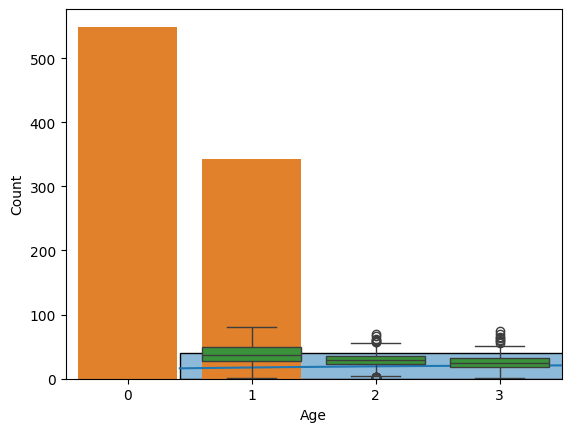

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(train_data['Age'].dropna(), kde=True)
sns.countplot(x='Survived', data=train_data)
sns.boxplot(x='Pclass', y='Age', data=train_data)
plt.show()

#Data Preprocessing


In [21]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)

In [22]:
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)

#Model Building

In [23]:
X_train = train_data[['Pclass', 'Age', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
y_train = train_data['Survived']

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

#Model Evaluation


In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_val_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])

print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}, ROC-AUC: {roc_auc}')

Accuracy: 0.7988826815642458, Precision: 0.7638888888888888, Recall: 0.7432432432432432, F1-Score: 0.7534246575342465, ROC-AUC: 0.8799227799227799


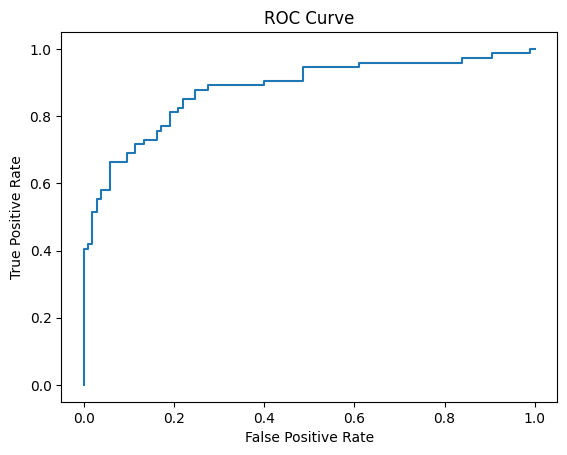

In [26]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_val, model.predict_proba(X_val)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#Interpretation

In [27]:
coef = pd.DataFrame(model.coef_, columns=X_train.columns)
print(coef)

     Pclass       Age      Fare  Sex_male  Embarked_Q  Embarked_S
0 -1.009233 -0.025294  0.000323 -2.457502   -0.084358   -0.519335


#Deployment with Streamlit

In [28]:
pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [29]:
import pickle

# Save the trained model to a file
with open('titanic_logistic_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [30]:
import streamlit as st
import pickle
import numpy as np

# Load the trained model
with open('titanic_logistic_model.pkl', 'rb') as file:
    model = pickle.load(file)

st.title("Titanic Survival Prediction")

# Get user input for the features
pclass = st.selectbox("Select Passenger Class (Pclass)", [1, 2, 3])
age = st.slider("Age", 0, 100, 25)
fare = st.slider("Fare", 0, 500, 50)
sex = st.selectbox("Select Sex", ["Male", "Female"])
embarked = st.selectbox("Embarked Location", ["Cherbourg (C)", "Queenstown (Q)", "Southampton (S)"])

# Convert categorical inputs to numerical values
sex_male = 1 if sex == "Male" else 0
embarked_Q = 1 if embarked == "Queenstown (Q)" else 0
embarked_S = 1 if embarked == "Southampton (S)" else 0

# Create a feature array for prediction
features = np.array([[pclass, age, fare, sex_male, embarked_Q, embarked_S]])

# Make a prediction when the user clicks the button
if st.button("Predict Survival"):
    prediction = model.predict(features)
    prediction_proba = model.predict_proba(features)

    if prediction[0] == 1:
        st.success(f"The model predicts this passenger *would survive* with a probability of {prediction_proba[0][1]:.2f}.")
    else:
        st.error(f"The model predicts this passenger *would not survive* with a probability of {prediction_proba[0][0]:.2f}.")

2024-09-16 07:21:51.003 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-16 07:21:51.227 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-09-16 07:21:51.234 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-16 07:21:51.240 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-16 07:21:51.245 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-16 07:21:51.251 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-16 07:21:51.252 Session state does not function when running a script without `streamlit run`
2024-09-16 07:21:51.257 Thread 'MainThread': missing ScriptRunContext! 

cd path/to/your/folder,
open in Command Prompt

In [ ]:
streamlit run app.py

#Interview Questions:

#1. What is the difference between precision and recall?

Precision and recall are both metrics used to evaluate the performance of classification models, especially in cases where the class distribution is imbalanced (e.g., detecting fraud or spam). These metrics provide insight into different aspects of model performance.

Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. It answers the question: Out of all the predicted positive results, how many were actually positive?

Precision
=
True Positives
True Positives
+
False Positives
Precision=
True Positives+False Positives
True Positives
​

High precision means that when the model predicts a positive class, it's usually correct (few false positives).
Recall (Sensitivity/True Positive Rate): Recall is the ratio of correctly predicted positive observations to all actual positives. It answers the question: Out of all the actual positive cases, how many did the model correctly identify?

Recall
=
True Positives
True Positives
+
False Negatives
Recall=
True Positives+False Negatives
True Positives
​

High recall means the model correctly identifies most positive cases (few false negatives).
Key Difference:
Precision focuses on the accuracy of positive predictions.
Recall focuses on the ability to identify all positive instances.
Example: In a medical test for a rare disease:

If the test has high precision, it means that most of the people identified as having the disease actually have it (few false positives).
If the test has high recall, it means the test identifies most people who truly have the disease, but it may also incorrectly flag healthy people as having the disease (false positives).

#2. What is cross-validation, and why is it important in binary classification?

Cross-validation is a technique used to assess the generalization performance of a model by splitting the data into multiple subsets (folds) and training the model on different combinations of these subsets. It helps ensure that the model performs well on unseen data.

K-Fold Cross-Validation: The most commonly used method, where the dataset is divided into k subsets (folds). The model is trained on k-1 folds and tested on the remaining fold. This process is repeated k times, with each fold used exactly once as a test set. The final performance is the average of all iterations.

For example, in 5-fold cross-validation, the dataset is split into 5 parts. The model is trained on 4 parts and tested on the remaining 1 part. This is repeated 5 times, and the results are averaged.

Why is it important in binary classification?

Prevents Overfitting: Cross-validation helps ensure that the model is not just memorizing the training data but generalizes well to unseen data.

Reduces Bias: Instead of training and testing the model on a single dataset split (which can introduce bias due to how the data is divided), cross-validation allows every data point to be used for both training and testing.

More Reliable Evaluation: In binary classification, especially with imbalanced classes, using only one training-test split might give misleading results. Cross-validation provides a more robust estimate of model performance.

Hyperparameter Tuning: It is often used in combination with techniques like Grid Search or Random Search to tune hyperparameters, ensuring the best model configuration without overfitting.